# Sparks Foundation
# GRIP Internship
Sparks Foundation GRIP August21 - Data Science And Business Analytics Internship

### Task-6 : Prediction using Decision Tree Algorithm

Given - The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

Dataset: https://bit.ly/3kXTdox.

### Author : Mohommad Faraaz Firoz Khan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('iris.csv', index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


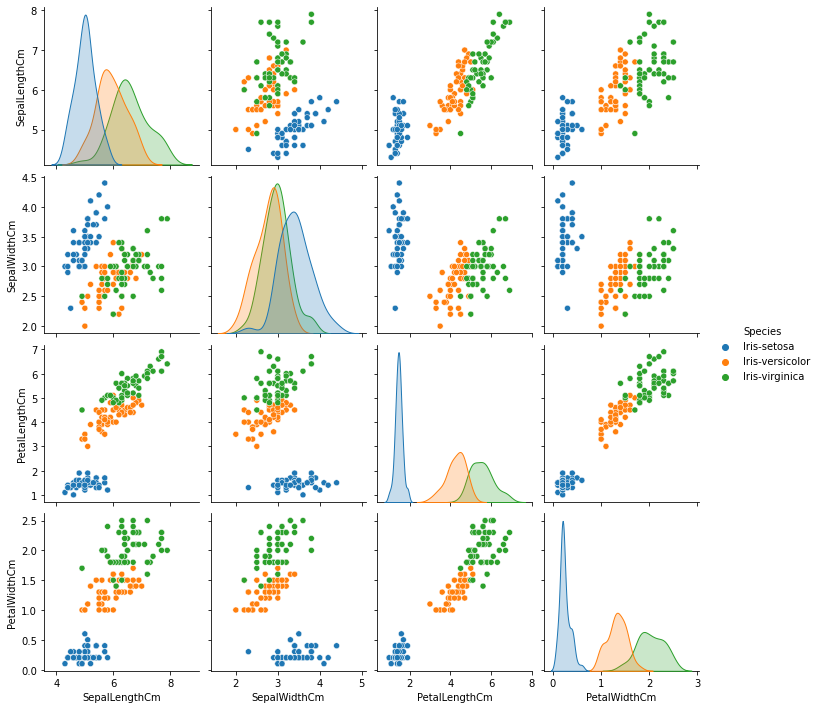

In [4]:
import seaborn as sns
sns.pairplot(data, hue = "Species")

In [5]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


In [6]:
data.shape

(150, 5)

### Data Preprocessing

In [7]:
target = data['Species']
df = data.copy()
df = df.drop('Species', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,,,,
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2


In [8]:
df.shape

(150, 4)

In [9]:
from sklearn.preprocessing import LabelEncoder
X = data.iloc[:, [0, 1, 2, 3]].values
encoder = LabelEncoder()
data['Species']=encoder.fit_transform(data['Species'])
y = data['Species'].values
data.shape

(150, 5)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Training Model

In [11]:
#Training model using Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
y_pred = classifier.predict(X_test)

In [13]:
compare = pd.DataFrame({"Actual": y_test, "Predicted": y_pred})
compare

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


In [14]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

1.0

[Text(558.0, 498.3, 'PetalWidthCm <= 0.8\ngini = 0.66\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-setosa'),
 Text(472.15384615384613, 407.70000000000005, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(643.8461538461538, 407.70000000000005, 'PetalWidthCm <= 1.75\ngini = 0.5\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris-setosa'),
 Text(343.38461538461536, 317.1, 'PetalLengthCm <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-setosa'),
 Text(171.69230769230768, 226.5, 'PetalWidthCm <= 1.65\ngini = 0.06\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-setosa'),
 Text(85.84615384615384, 135.89999999999998, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-setosa'),
 Text(257.53846153846155, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-setosa'),
 Text(515.0769230769231, 226.5, 'PetalWidthCm <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = Iris-setosa'),
 Text(429.23076923076917, 

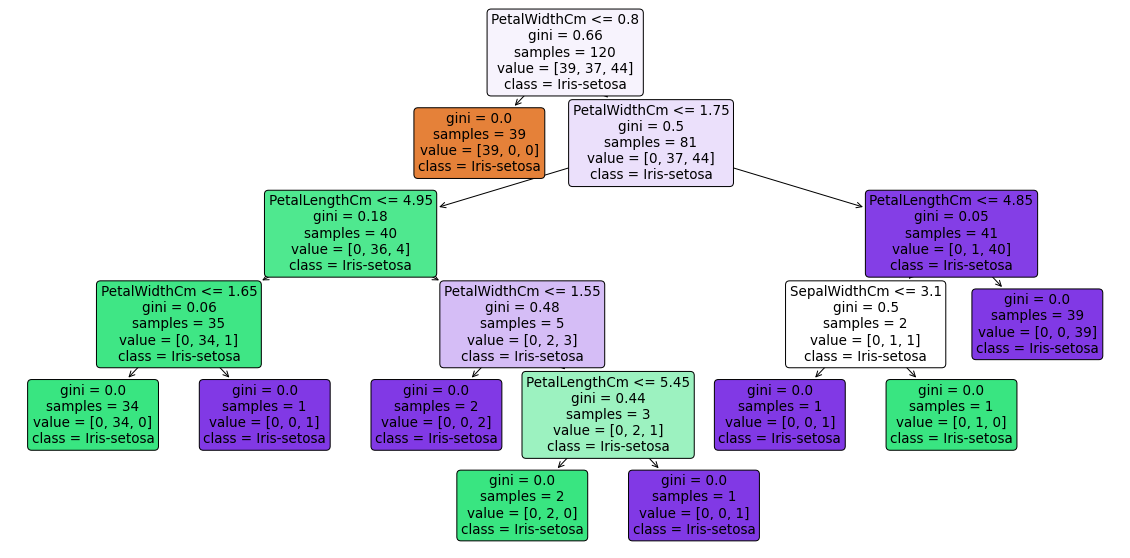

In [15]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(classifier,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)